In [117]:
import sys
import os
sys.path.insert(0, '..')
import plots
import pandas as pd
import matplotlib.pyplot as plt

analyzer = plots.DataAnalyser()

len reasonable 54


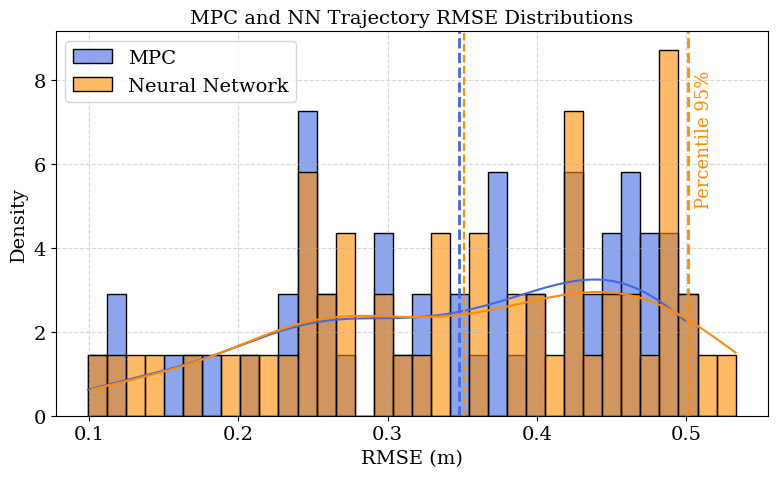

In [118]:
plt.rcParams.update({'font.family': 'serif'})
plt.rcParams.update({'font.size': 14})
path = '../../training_results/25-05-27-optunav2-reasonable-trj/dataset_metadata.csv'
df_total = pd.read_csv(path, sep=',')

# Filters - reasonable trajectories
df_reasonable = df_total[(df_total['mpc_success'] == True) & (df_total['mpc_RMSe'] <= 0.5 ) & (df_total['nn_success'] == True)]
print('len reasonable', len(df_reasonable))

analyzer.plot_histogram(df_reasonable, 'mpc_RMSe', 'nn_RMSe', 'RMSE (m)','MPC and NN Trajectory RMSE Distributions', ['MPC', 'Neural Network'], save_name='trajectory_rmse.pdf', percentile_2=0.95)
#c.plot_histogram('training_results\Training dataset v0 - octorotor/', 'mpc_execution_time (s)', 'nn_execution_time', '$t_{execution}/t_{simulation}$', 'Comparison of Execution Time Distributions', ['MPC', 'Neural Network'], normalization_column='simulation_time (s)')


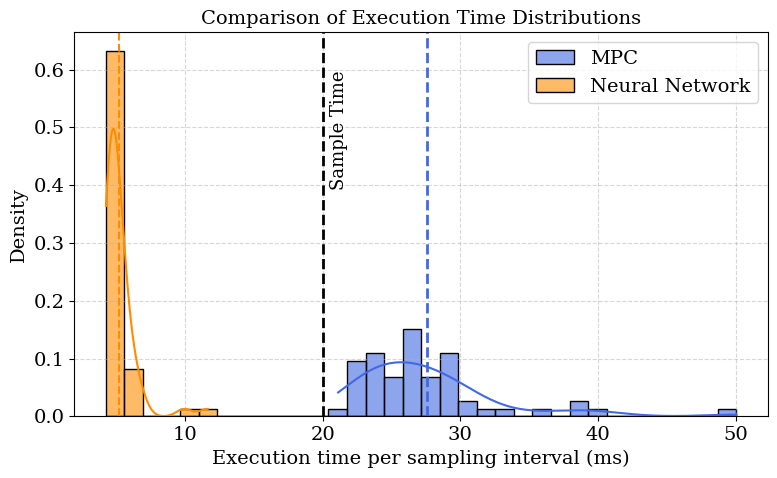

In [119]:
analyzer.plot_histogram(df_reasonable, 'mpc_execution_time (s)', 'nn_execution_time (s)', 'Execution time per sampling interval (ms)', 'Comparison of Execution Time Distributions', ['MPC', 'Neural Network'], normalization_column='num_iterations', save_name='exec_time_hist.pdf', gain=1000)
#c.plot_histogram('training_results\Training dataset v0 - octorotor/', 'mpc_execution_time (s)', 'nn_execution_time', 'CPU Use Percentage', 'Comparison of CPU Use Percentage', ['MPC', 'Neural Network'], normalization_column=['time_sample (s)', 'num_iterations'])



In [120]:
stats_rmse = analyzer.stats_simulations(df_reasonable, 'mpc_RMSe', 'nn_RMSe')
stats_rmse



,Controller,min,max,mean,std
0,MPC,0.099438,0.499173,0.347910,0.113015
1,Neural Network,0.101816,0.532946,0.351393,0.116674


In [121]:
stats_execution_time = analyzer.stats_simulations(df_reasonable, 'mpc_execution_time_per_iteration', 'nn_execution_time_per_iteration')
stats_execution_time


,Controller,min,max,mean,std
0,MPC,0.021127,0.050032,0.027596,0.005250
1,Neural Network,0.004275,0.011663,0.005244,0.001266


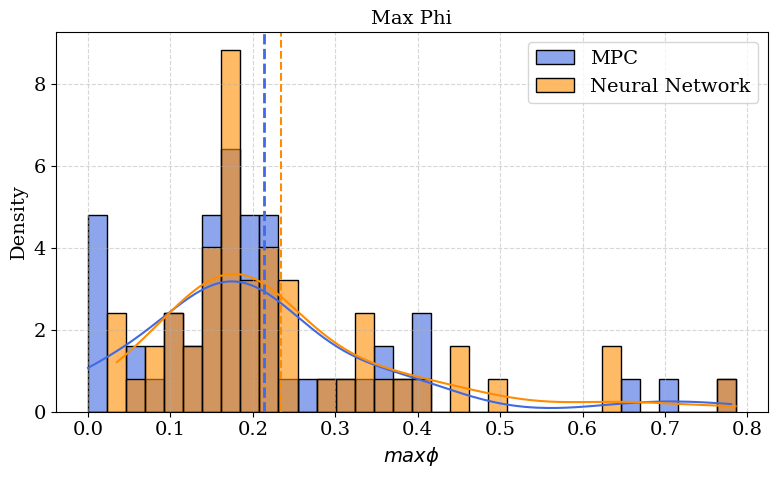

In [122]:
analyzer.plot_histogram(df_reasonable, 'mpc_max_phi (rad)', 'nn_max_phi', '$max \\phi$', 'Max Phi', ['MPC', 'Neural Network'])

In [123]:
stats_max_phi = analyzer.stats_simulations(df_reasonable, 'mpc_max_phi (rad)', 'nn_max_phi')
stats_max_phi

,Controller,min,max,mean,std
0,MPC,1.026093e-08,0.780306,0.213601,0.161025
1,Neural Network,3.494203e-02,0.785703,0.234144,0.154044


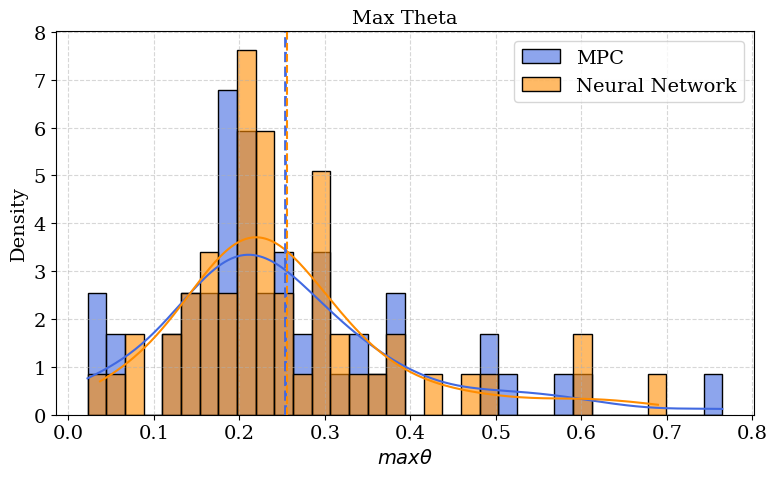

In [124]:
analyzer.plot_histogram(df_reasonable, 'mpc_max_theta (rad)', 'nn_max_theta', '$max \\theta$', 'Max Theta', ['MPC', 'Neural Network'])

In [125]:
# df_performance = df_total[(df_total['mpc_success'] == True) & 
#                           (df_total['nn_success'] == True) & 
#                           (df_total['trajectory_type'] == 'circle_xy')
#                           ]
# x = df_performance['period (s)']
# y1 = df_performance['nn_RMSe']
# y2 = df_performance['mpc_RMSe']

# fig = plt.figure()
# plt.plot(x,y1)
# plt.plot(x,y2)
# plt.xlabel('Period (s)')
# plt.ylabel('RMSe (m)')
# plt.title('RMSe vs Period')
# plt.legend(['Neural Network', 'MPC'])

In [126]:
# x = df_performance['period (s)']
# y1 = df_performance['nn_max_phi']
# y2 = df_performance['mpc_max_phi (rad)']

# fig = plt.figure()
# plt.plot(x,y1)
# plt.plot(x,y2)
# plt.xlabel('Period (s)')
# plt.ylabel('Max $\\phi$ (rad)')
# plt.title('Max Phi vs Period')
# plt.legend(['Neural Network', 'MPC'])

In [127]:
# x = df_performance['period (s)']
# y1 = df_performance['nn_max_theta']
# y2 = df_performance['mpc_max_theta (rad)']

# fig = plt.figure()
# plt.plot(x,y1)
# plt.plot(x,y2)
# plt.xlabel('Period (s)')
# plt.ylabel('Max $\\theta$ (rad)')
# plt.title('Max Theta vs Period')
# plt.legend(['Neural Network', 'MPC'])

c:\Users\mathe\OneDrive\Documentos\Embraer\PEE 31\ITA\Fase IV - Mestrado\Drive - Mestrado NN aplicado a Controle\Codes\6dof_quadrotor\figures-tables\..\plots.py:519: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)
c:\Users\mathe\OneDrive\Documentos\Embraer\PEE 31\ITA\Fase IV - Mestrado\Drive - Mestrado NN aplicado a Controle\Codes\6dof_quadrotor\figures-tables\..\plots.py:521: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon=False)


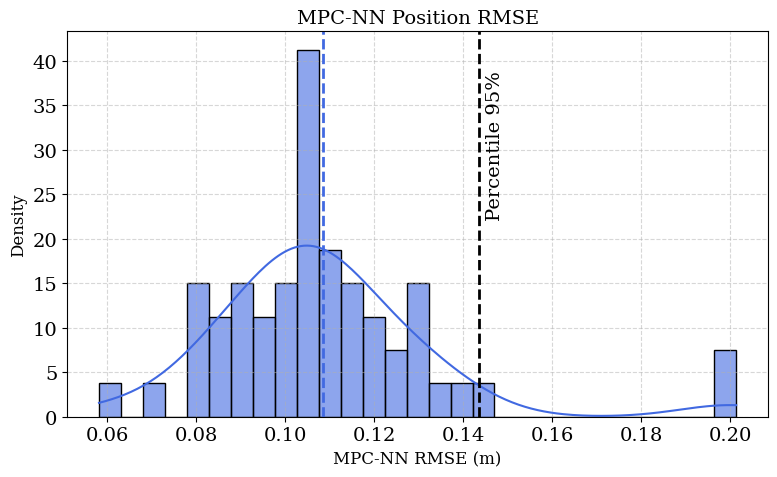

In [128]:
# MPC-NN Position RMSE
analyzer.plot_histogram_temp(df_reasonable, 'inter_position_RMSe', 'MPC-NN RMSE (m)', 'MPC-NN Position RMSE', percentile=0.95, save_name='inter-rmse.pdf')

C:\Users\mathe\AppData\Local\Temp\ipykernel_84804\1614591183.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_reasonable[f'RMSe_u{i}'] for i in range(8)], labels=[f'R{i+1}' for i in range(8)])


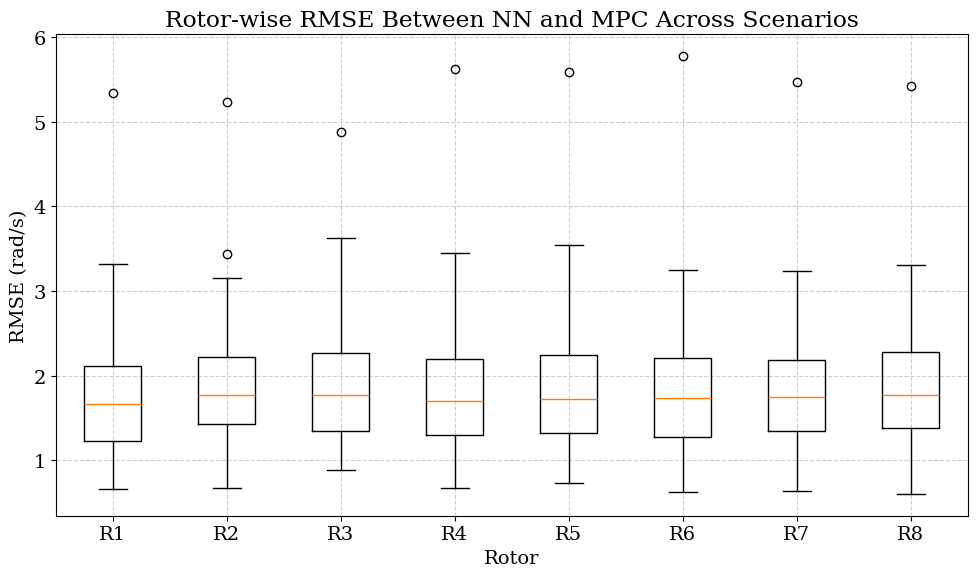

In [129]:
# Rotor-wise RMSE Between NN and MPC across scenarios
plt.figure(figsize=(10, 6))
plt.boxplot([df_reasonable[f'RMSe_u{i}'] for i in range(8)], labels=[f'R{i+1}' for i in range(8)])
plt.ylabel("RMSE (rad/s)")
plt.xlabel("Rotor")
plt.title("Rotor-wise RMSE Between NN and MPC Across Scenarios")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('plots/omega_boxplots.pdf')
plt.show()

In [130]:
df_reasonable[df_reasonable['RMSe_u0'] > 4][['mpc_RMSe', 'nn_RMSe']]

,mpc_RMSe,nn_RMSe
173,0.465087,0.467723


In [134]:
df_reasonable.groupby('trajectory_type').size()

trajectory_type
circle_xy       18
circle_xz        4
line            16
lissajous_xy    16
dtype: int64

In [ ]:
#Next steps
# Include omega_max in dataset_metadata
# Describe reasonable trajectory in text
# Describe MPC parameters for the simulations
# OBS: SCRIPT DE SAIDA EM CASO DE DISTANCIAMENTO ESTA OCULTADO E PRECISAM SER HARMONIZADOS SE FOREM REATIVADOS!!!